In [ ]:
import numpy as np

from forban import *
from forban.bandits import NormalBandit, Normal
from forban.utils import *

from algorithms import *

import matplotlib.pyplot as plt

NBR_EXP = 1000
HORIZON = 2000

In [ ]:
def equivalentComplexity(bandit, kullback=klGaussian):
    suboptimal_arms = np.where(bandit.regrets != 0.)[0]
    class_size = len(np.where(bandit.regrets == 0.)[0])
    term_1 = bandit.regrets[suboptimal_arms]
    term_2 = kullback(bandit.rewards[suboptimal_arms], bandit.best_reward)
    c = sum(term_1 / term_2)
    return c / class_size


def EquivalentBandit(nbr_class, nbr_arm_per_class, rewards=None, min_reward=0, max_reward=1):
    if rewards == None:
        class_rewards = (max_reward - min_reward) * np.random.rand(nbr_class) + min_reward
        rewards = [class_rewards[i//nbr_arm_per_class] \
                for i in range(nbr_class*nbr_arm_per_class)]

    # assert nbr_class * nbr_arm_per_class == len(rewards)
    bandit_instance = NormalBandit(rewards, structure="Equivalent",
            complexity=equivalentComplexity)
    return bandit_instance

# XP 1

The equivalent-class complexity of the generated bandit problem is 12.499999999999996


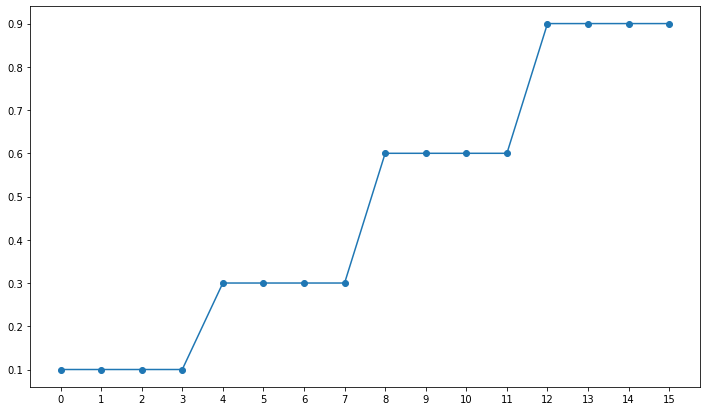

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*4+[0.3]*4+[0.6]*4+[0.9]*4)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':4}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment1 = Experimentl([klucb, imed, imed4e], bandit,
                        complexity=False)
experiment1.run(NBR_EXP, HORIZON)

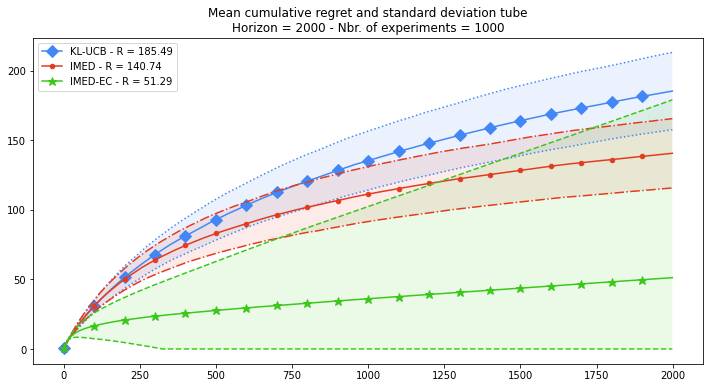

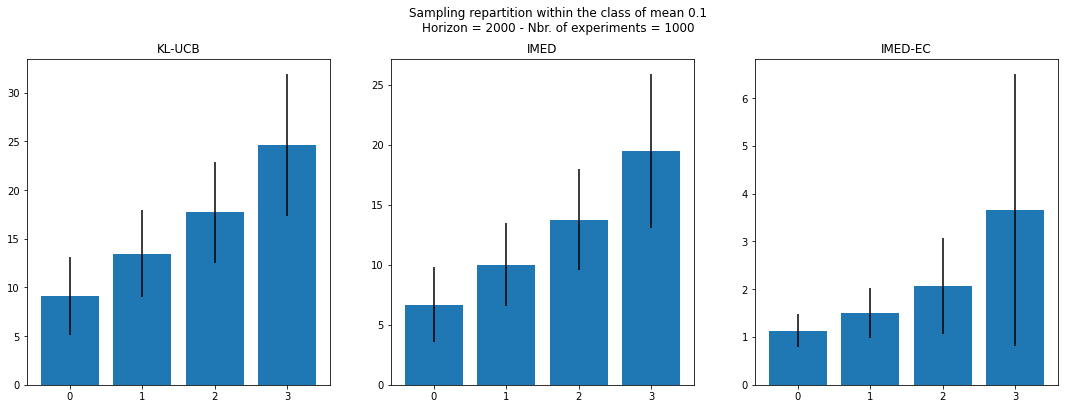

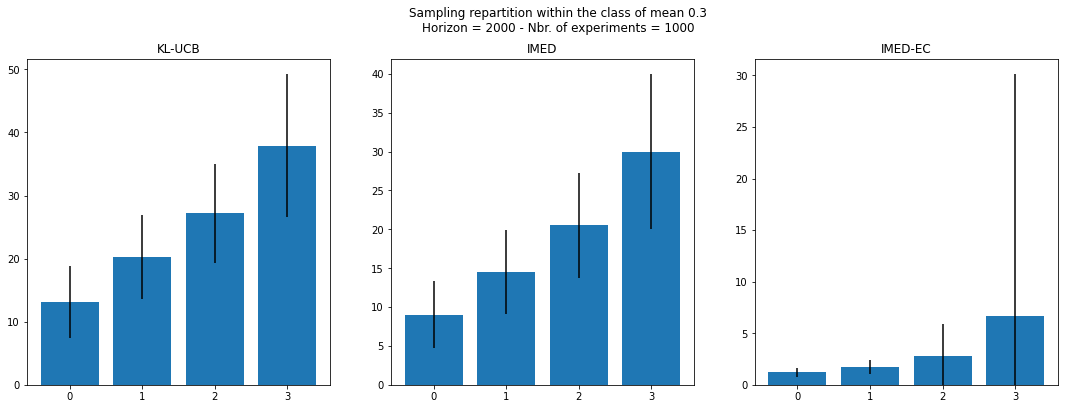

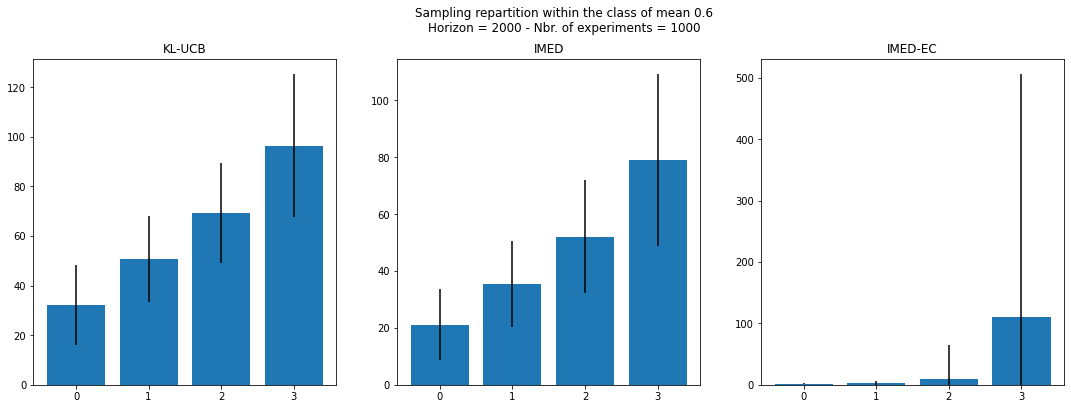

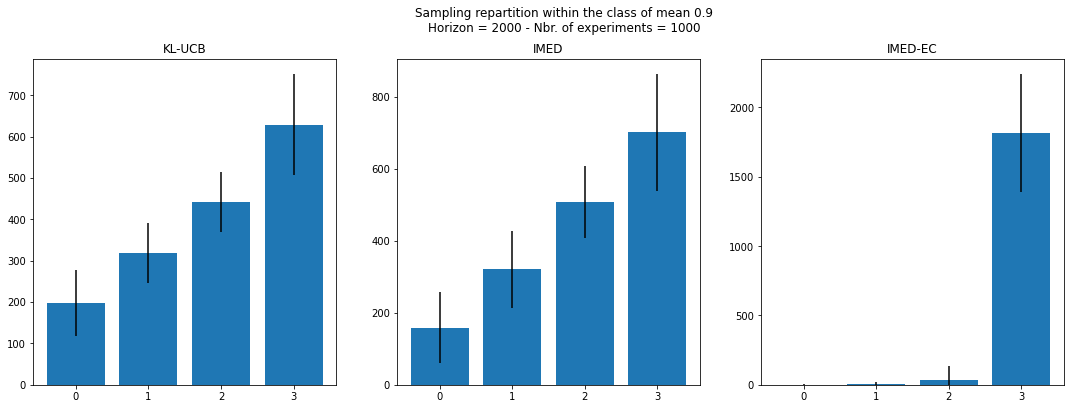

In [ ]:
experiment1.plot()

# XP 2

The equivalent-class complexity of the generated bandit problem is 12.500000000000005


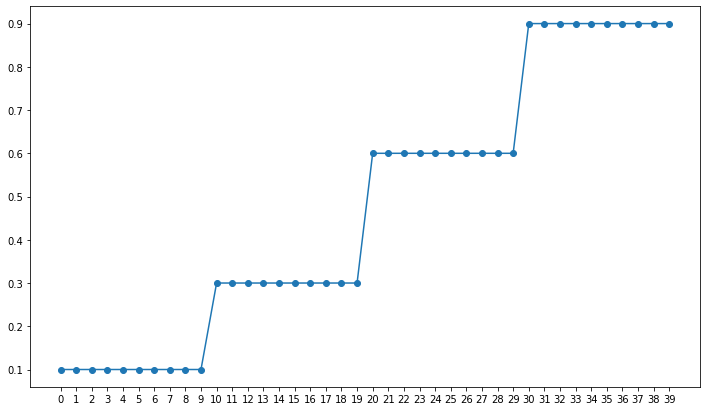

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*10+[0.6]*10+[0.9]*10)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
np.arange(40)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [ ]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':4}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment2 = Experimentl([klucb, imed, imed4e], bandit,
                          qclass = {"mean 0.1":np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
                                    "mean 0.3":np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                    "mean 0.6":np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 
                                    "mean 0.9":np.array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]) },
                        complexity=False)
experiment2.run(NBR_EXP, HORIZON)

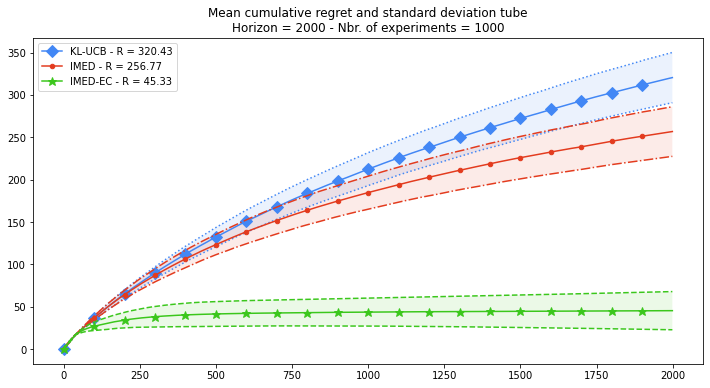

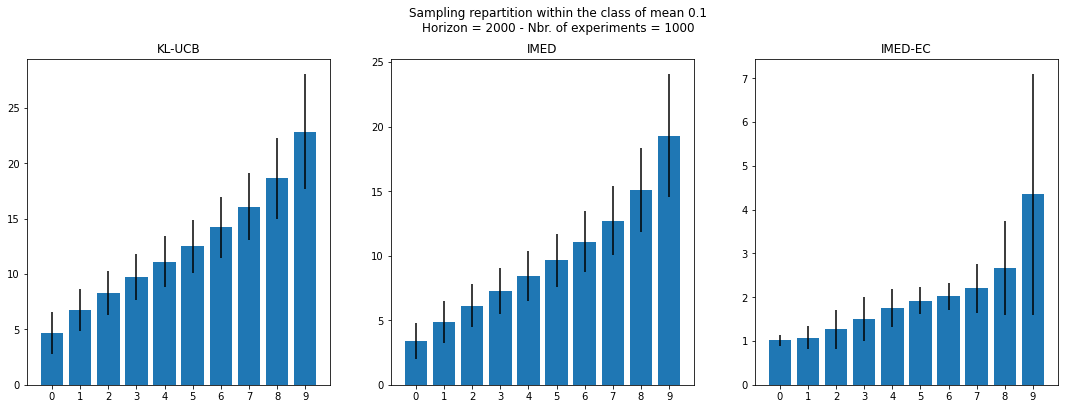

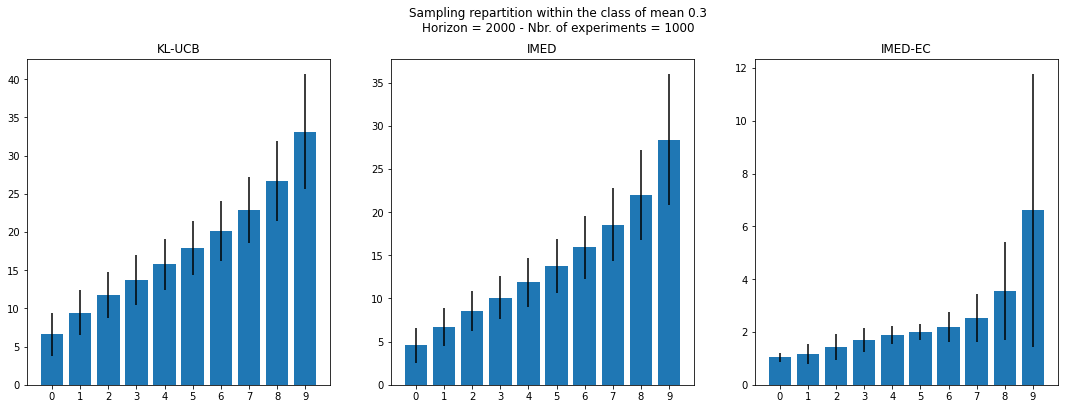

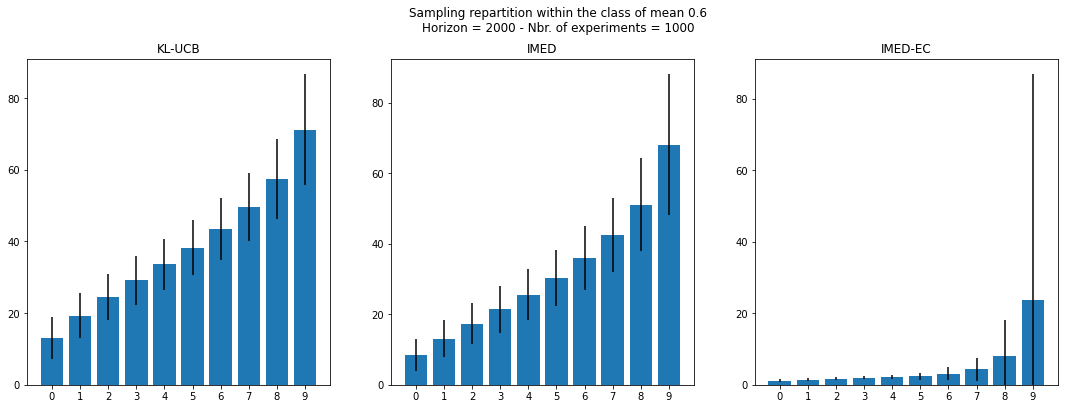

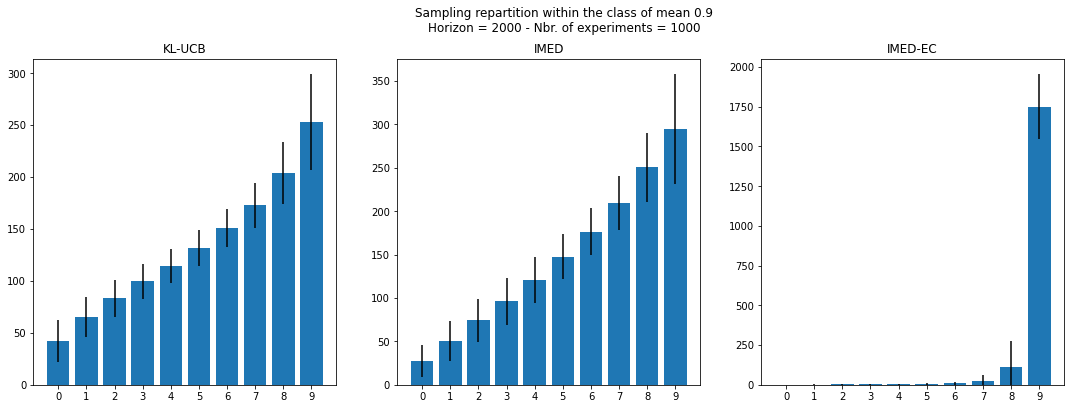

In [ ]:
experiment2.plot()

# XP 3

The equivalent-class complexity of the generated bandit problem is 12.500000000000005


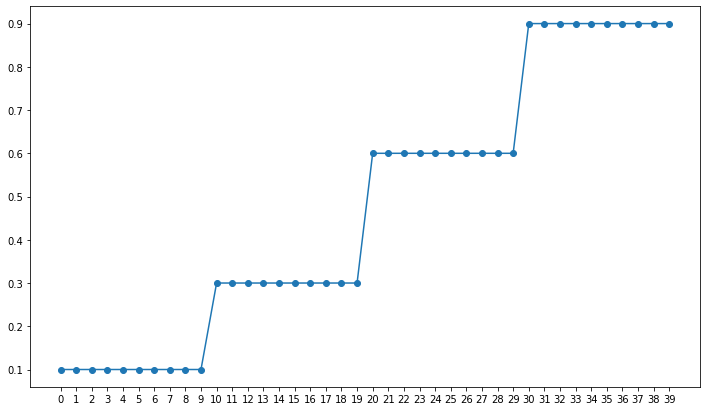

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*10+[0.6]*10+[0.9]*10)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':4, 'nepc':10}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment3 = Experimentl([klucb, imed, imed4e], bandit,
                          qclass = {"mean 0.1":np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
                                    "mean 0.3":np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                    "mean 0.6":np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 
                                    "mean 0.9":np.array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]) },
                        complexity=False)
experiment3.run(NBR_EXP, HORIZON)

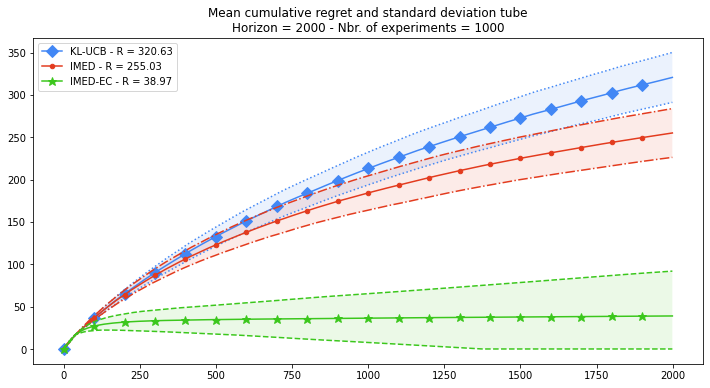

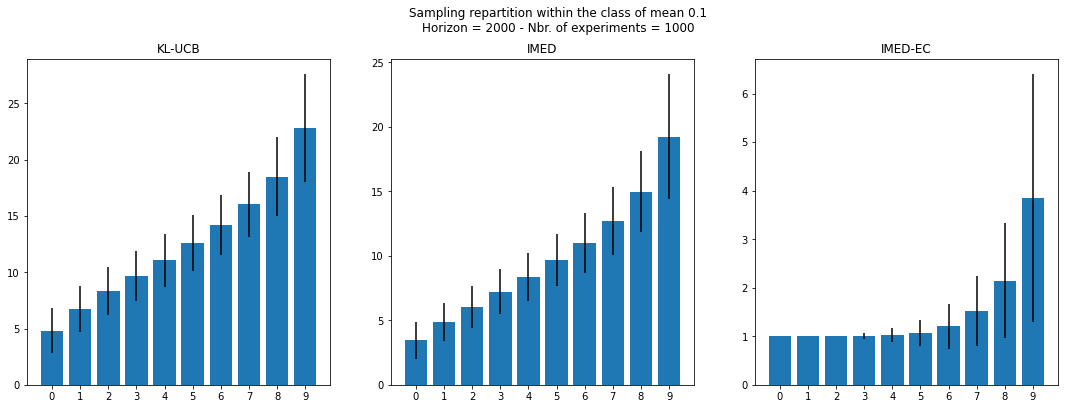

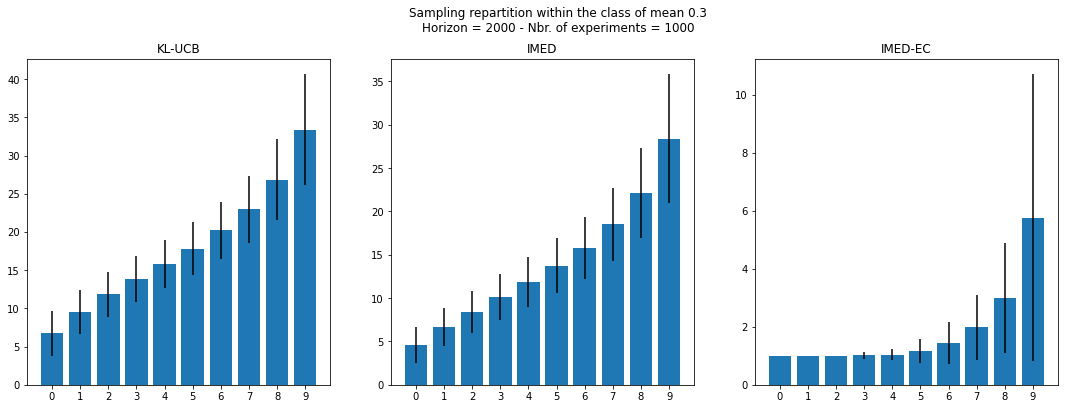

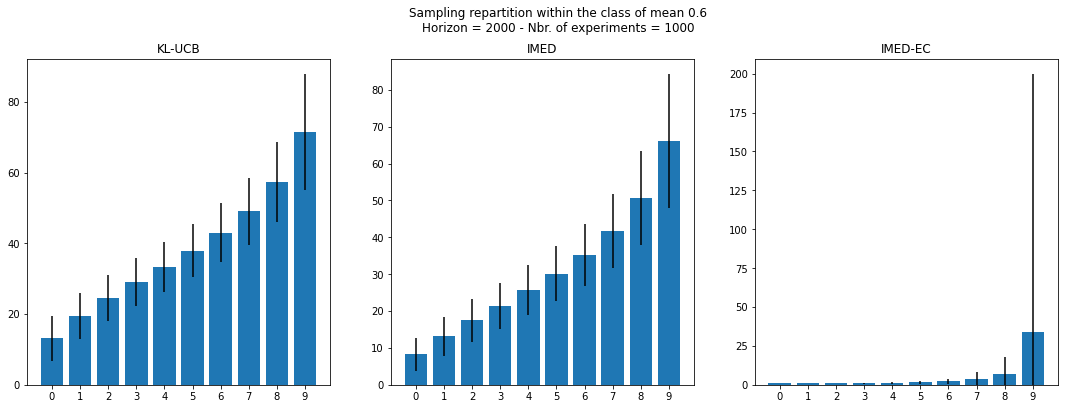

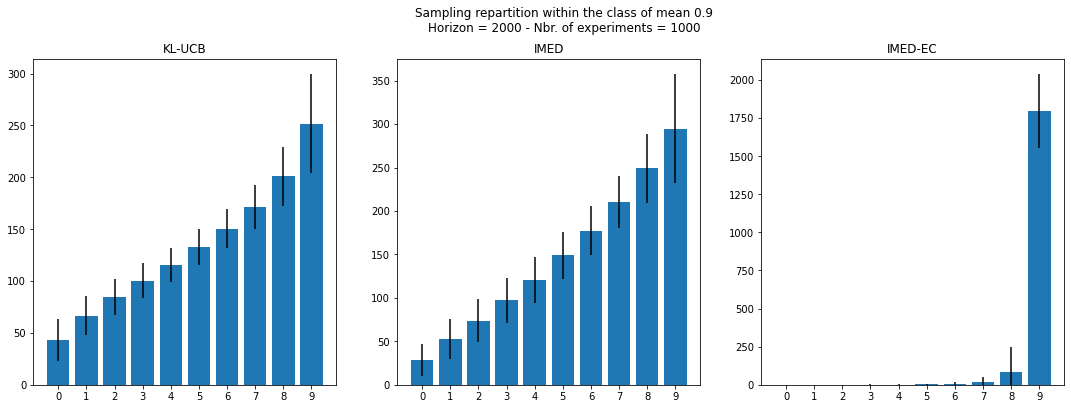

In [ ]:
experiment3.plot()

# XP 4

The equivalent-class complexity of the generated bandit problem is 48.62499999999997


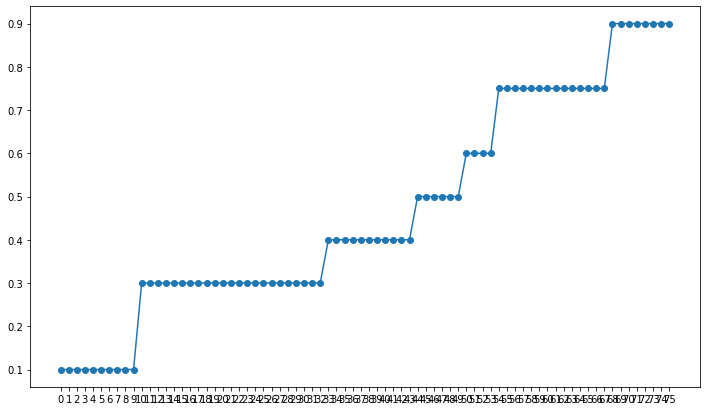

In [ ]:
bandit = EquivalentBandit(4, 7, rewards = [0.1]*10+[0.3]*23+[0.4]*11+[0.5]*6+[0.6]*4+[0.75]*14+[0.9]*8)
print(f"The equivalent-class complexity of the generated bandit problem is {bandit.complexity()}")
plot_bandit(bandit)

In [ ]:
imed = IMED(bandit) # IMED strategy
imed4e = RelaxedCombinatorialIMED(bandit, params={'init': -np.inf, 'kl':klGaussian, 'c':3, 'nepc':3}) # IMED-EC strategy
klucb = KLUCB(bandit) # KL-UCB strategy
experiment4 = Experimentl([klucb, imed, imed4e], bandit,
                          qclass = {"mean 0.1":np.arange(10),
                                    "mean 0.3":10+np.arange(23),
                                    "mean 0.4":33+np.arange(11),
                                    "mean 0.5":44+np.arange(6),
                                    "mean 0.6":50+np.arange(4),
                                    "mean 0.75":54+np.arange(14),
                                    "mean 0.9":68+np.arange(8) },
                        complexity=False)
experiment4.run(NBR_EXP, HORIZON)
# experiment4.run(10, 500)

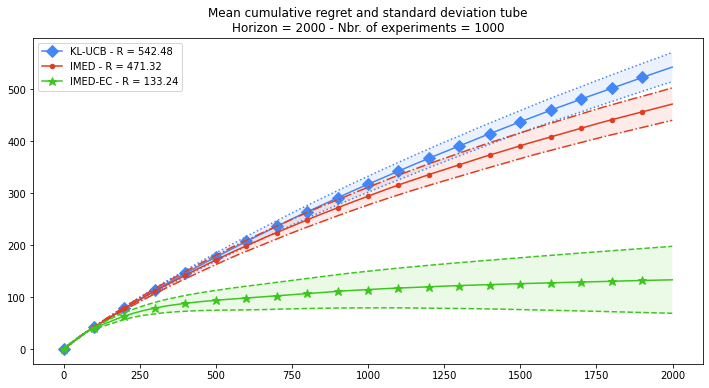

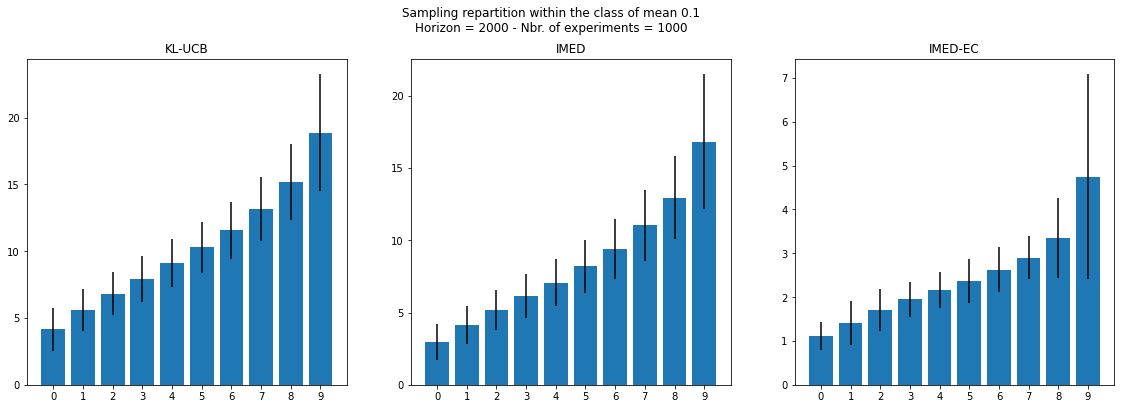

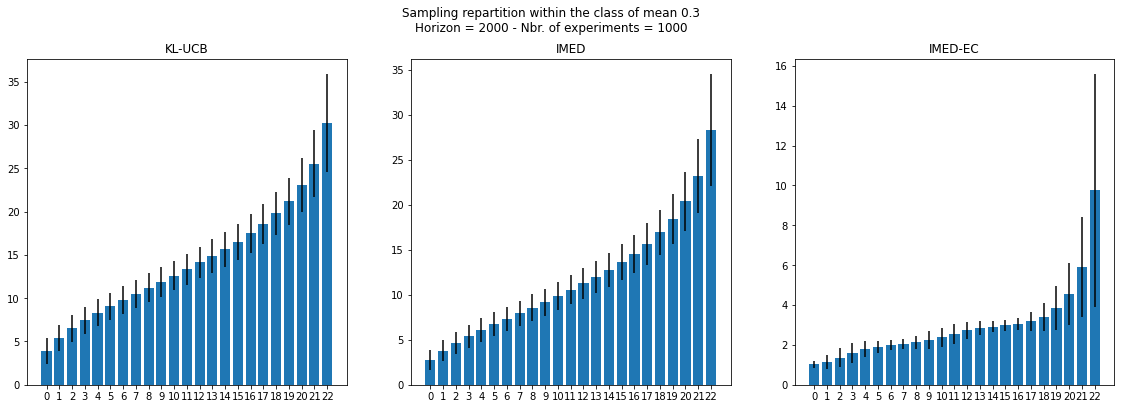

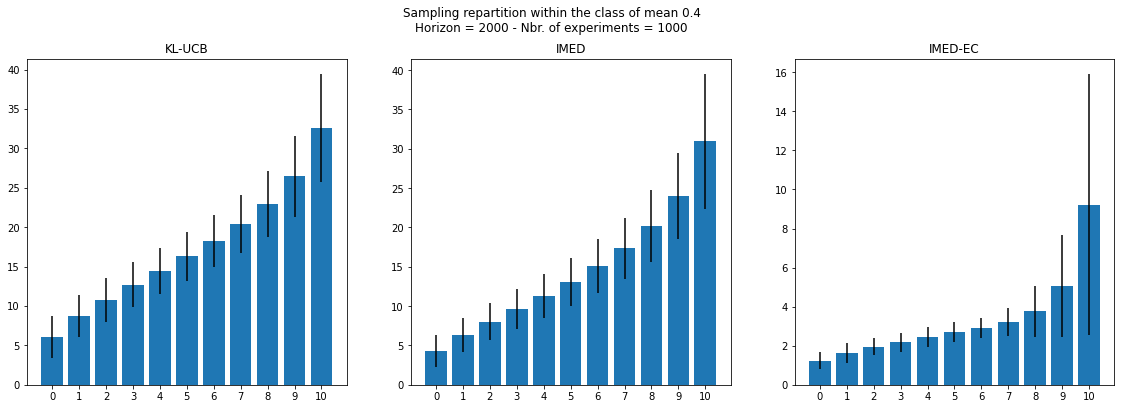

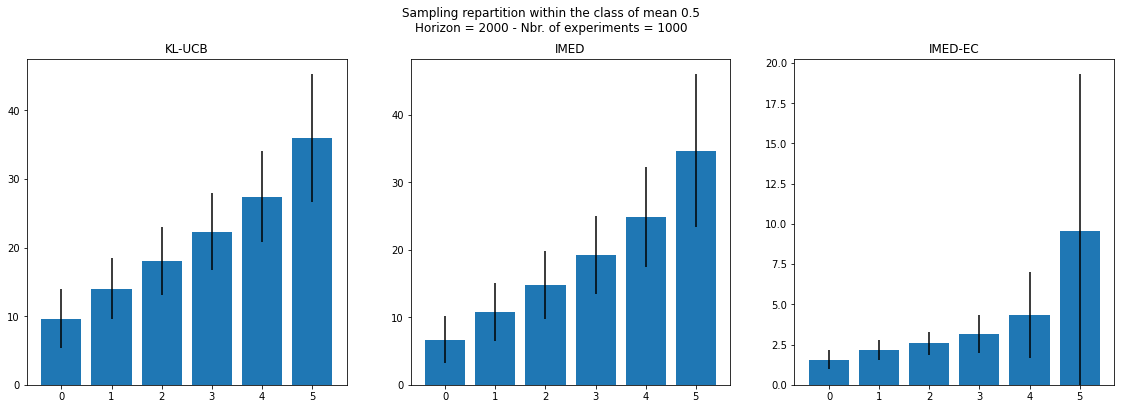

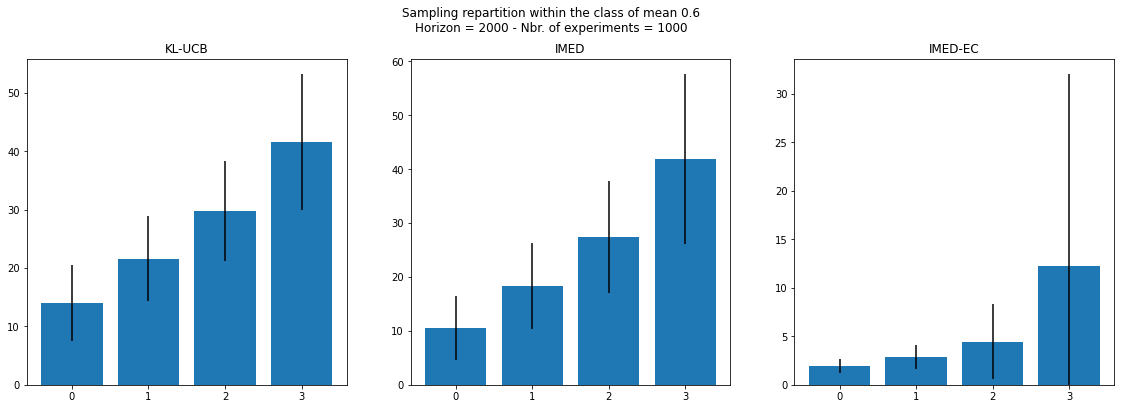

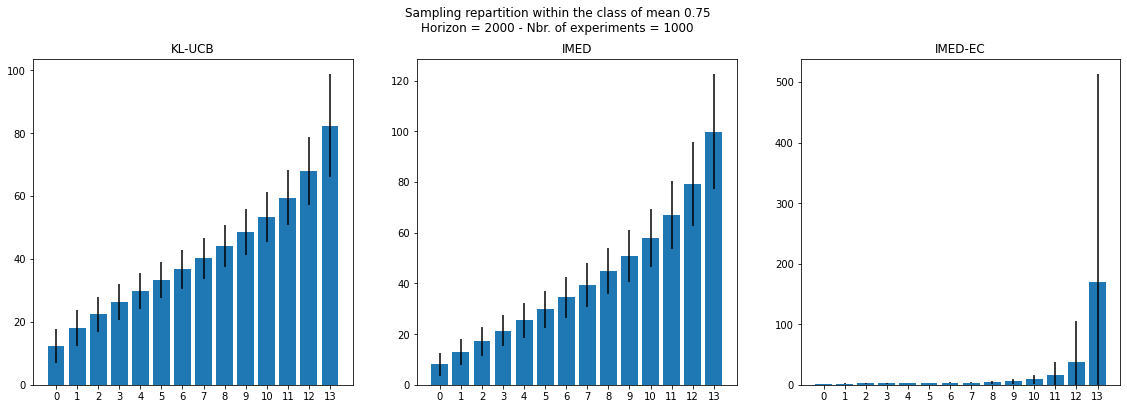

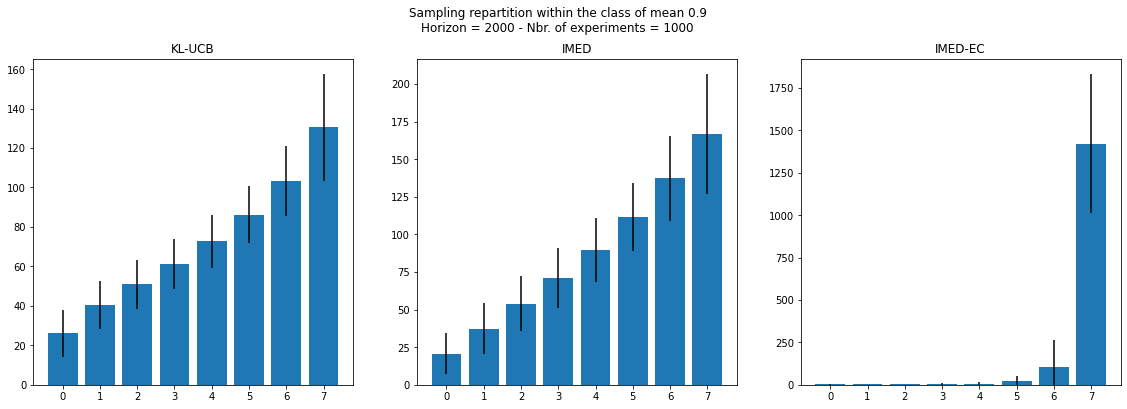

In [ ]:
experiment4.plot()